In [ ]:
!pip install vaderSentiment



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/modern_feminism_sentiment/data/processed/feminism_preprocessed.csv')


In [ ]:
df.head()


,date,username,retweets,likes,tweet_text,hashtags,clean_text
0,2018-09-25 20:33:53,DanielleMuscato,10682,21677,"Ladies, a question for you: ""What would you do...",#metoo #metoo #Kavanaugh #Cosby #feminism #mal...,lady question would men curfew dude read reply...
1,2019-11-29 12:05:32,bbcle,4176,6269,This is a #Chilean #feminist #protest by the g...,#Chilean #feminist #protest #Lastesis #questio...,chilean feminist protest group lastesis answer...
2,2019-03-11 15:11:55,TheBrandonMorse,3240,11968,#Feminism is really making some great strides ...,#Feminism,feminism really making great stride
3,2019-05-09 16:10:51,Payal_Rohatgi,2034,6341,Swara aunty calls herself a supporter of #Femi...,#Feminism #ModiAaneWalaHai #JustModi #RahulKaB...,swara aunty call supporter feminism supporter ...
4,2019-08-30 20:50:51,fuxkinglnz,2029,2560,Young girl named israa ghareeb was beaten to d...,#feminism #feminist,young girl named israa ghareeb beaten death da...


In [ ]:
df.shape


(237317, 7)

In [ ]:
analyzer = SentimentIntensityAnalyzer()


In [ ]:
def get_sentiment_scores(text):
    return analyzer.polarity_scores(str(text))


In [ ]:
sentiment_scores = df["clean_text"].apply(get_sentiment_scores)

sentiment_df = pd.DataFrame(list(sentiment_scores))

df = pd.concat([df, sentiment_df], axis=1)


In [ ]:
def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["compound"].apply(label_sentiment)


In [ ]:
df["sentiment"].value_counts()


,count
sentiment,
Positive,109768
Negative,70848
Neutral,56701


<Axes: title={'center': 'Sentiment Distribution – Feminism Tweets'}, xlabel='sentiment'>

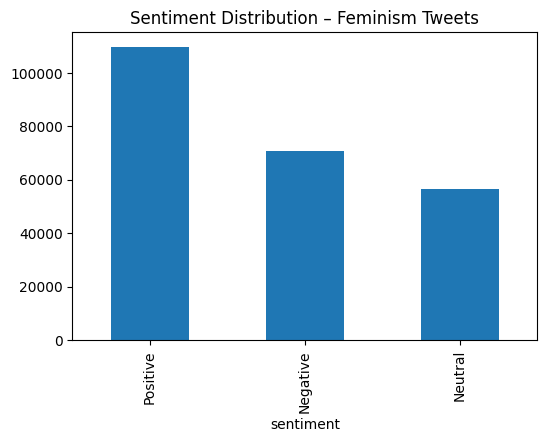

In [ ]:
df["sentiment"].value_counts().plot(
    kind="bar",
    title="Sentiment Distribution – Feminism Tweets",
    figsize=(6,4)
)


In [ ]:
df[
    ["tweet_text", "clean_text", "compound", "sentiment"]
].sample(5)


,tweet_text,clean_text,compound,sentiment
214015,Why is violence so expensive for our societies...,violence expensive society learn feel free sha...,0.1027,Positive
55667,"""I've used my femininity and my sexuality as a...",ive used femininity sexuality weapon tool that...,0.8020,Positive
112117,"'Engendering Democracy', @amazon #Anne_Phillip...",engendering democracy annephillips book womeni...,0.0000,Neutral
112183,Why women should have equal opportunities and ...,woman equal opportunity right country worldwid...,0.4215,Positive
129544,"Self Portrait // Falling // December 8, 2019 /...",self portrait falling december selfportraitsun...,-0.1531,Negative


In [ ]:
df.to_csv("feminism_sentiment_results.csv", index=False)
print("✅ feminism_sentiment_results.csv saved successfully")


✅ feminism_sentiment_results.csv saved successfully


In [ ]:
!ls


drive  feminism_sentiment_results.csv  sample_data
